Note: thingy.

Current Updates:
adding libraries I think we'll need


In [1]:
# Libraries for data wrangling and transformation
import requests 
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
# Libraries for data analysis
import matplotlib.pyplot as plt


# Miscellaneous
from datetime import datetime
import matplotlib.colors as mcolors

In [2]:
data = pd.read_csv("twitchdata-update.csv")

In [3]:
data

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
0,xQcOW,6196161750,215250,222720,27716,3246298,1734810,93036735,True,False,English
1,summit1g,6091677300,211845,310998,25610,5310163,1370184,89705964,True,False,English
2,Gaules,5644590915,515280,387315,10976,1767635,1023779,102611607,True,True,Portuguese
3,ESL_CSGO,3970318140,517740,300575,7714,3944850,703986,106546942,True,False,English
4,Tfue,3671000070,123660,285644,29602,8938903,2068424,78998587,True,False,English
...,...,...,...,...,...,...,...,...,...,...,...
995,LITkillah,122524635,13560,21359,9104,601927,562691,2162107,True,False,Spanish
996,빅헤드 (bighead033),122523705,153000,3940,793,213212,52289,4399897,True,False,Korean
997,마스카 (newmasca),122452320,217410,6431,567,109068,-4942,3417970,True,False,Korean
998,AndyMilonakis,122311065,104745,10543,1153,547446,109111,3926918,True,False,English


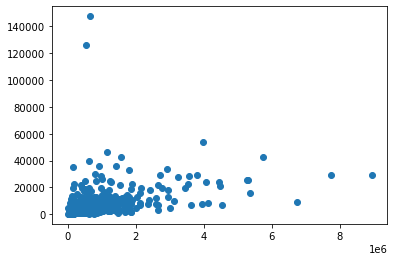

In [5]:
plt.scatter(data["Followers"], data["Average viewers"])

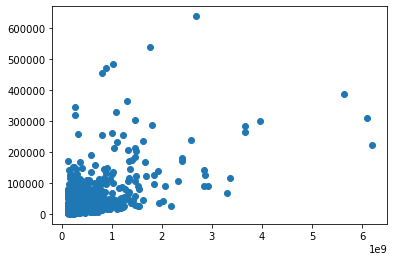

In [9]:
plt.scatter(data["Watch time(Minutes)"], data["Peak viewers"])

<BarContainer object of 1000 artists>

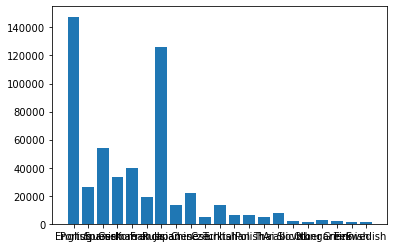

In [11]:
plt.bar(data["Language"], data["Average viewers"])

These are just a few that can be used to kickstart analysis